# Статистика, прикладной поток
## Практическое задание 4

В данном задании вы исследуете некоторые свойства доверительных интервалов и байесовских оценок, а также рассмотрите приближенный метод поиска оценки максимального правдоподобия.

**Правила:**

* Дедлайн **16 ноября 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[S19] Фамилия Имя - задание 4"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `4.N.ipynb` и `4.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. Правила оформления смотрите в презентации с первого практического занятия.
* При решении без доказательства можно пользоваться любыми теоретическими свойствами, которые были на лекциях или семинарах.
* Разделяйте код вычислений и отрисовки графиков. Так будет удобнее вам и проверяющим.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 -  5 баллов **O2**
* Задача 2 -  5 баллов **O2**
* Задача 3 -  5 баллов **O2**
* Задача 4 -  5 баллов **O2**
* Задача 5 -  7 баллов **O2**
* Задача 6 -  7 баллов **O2**
* Задача 7 -  7 баллов **O2**
* Задача 8 -  10 баллов **O3**
* Задача 9 -  6 баллов **O2**
* Задача 10 -  15 баллов **O3**

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set()
warnings.filterwarnings("ignore")

%matplotlib inline

## Доверительные интервалы

*Замечание.* Вы должны помнить о разнице между доверительным интервалом и *реализацией* доверительного интервала. На практике обычно слово *реализация* опускается.

__________________
### Задача 1.
В этой задаче нужно визуализировать доверительные интервалы для выборок из различных распределений. 

Чтобы не плодить код, напишите следующую функцию (см. ниже). Пример построения есть в ноутбуке по `matplotlib`. При необходимости можно добавить в функцию дополнительные аргументы.

In [2]:
def draw_confidence_interval(
        left,  # левая граница интервала
        right,  # правая граница интервала
        estimation=None,  # если задана, то рисуется график оценки
        sample=None,  # если задано, то рисуются точки выборки
        ylim=(None, None),  # ограничение по оси y
        estim_col='yellow',
        sample_col='red',
        interval_col='orange',
        label_est=r'$\theta$',
        label_interval="Точный",
        ylabel=r"$\theta$",
        xlabel="n",
        fontsize=20,
        alpha=0.2
    ):
    assert (left.shape[0] == right.shape[0])
    
    grid = np.arange(1, left.shape[0] + 1)
    plt.fill_between(grid, left, right, alpha=alpha, color=interval_col, 
                     label=label_interval + " Доверительный интервал для " + label_est)
    
    if not (estimation is None):
        plt.plot(grid, estimation, color=estim_col, linewidth=4,
                 label="Оценка " + label_est)
    if not (sample is None):
        plt.scatter(grid, sample, color=sample_col, alpha=alpha, s=40,
                    label="Выборка")
    plt.ylim(ylim)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.legend(fontsize=fontsize)

Рассмотрим следующие ситуации:

1. Выборка из распределения $\mathcal{N}(0, 1)$; точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$.

2. Выборка из распределения $U[0, 1]$; точный доверительный интервал минимальной длины в параметрической модели $U[0, \theta]$ на основе статистики $X_{(n)}$.

Для каждой ситуации из перечисленных выше сгенерируйте выборку $X_1, ... X_{100}$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок вида $X_1, ... X_i$, $1 \le i \le 100$.

Постройте графики зависимости верхних и нижних границ интервала от размера выборки, используя написанную функцию. Нужно нанести на график точки выборки.
Для вычисления квантилей у каждого распределения из `scipy.stats` используйте функцию `ppf`.


***1 случай***  
Выборка из распределения $\mathcal{N}(0, 1)$; точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$.

Точный доверительный интервал минимальной длины:
$$
\left( \overline{X} - z_{\frac{1+0.95}{2}} \cdot  \frac{1}{\sqrt{n}}, \overline{X} + z_{\frac{1+0.95}{2}} \cdot  \frac{1}{\sqrt{n}} \right)
$$

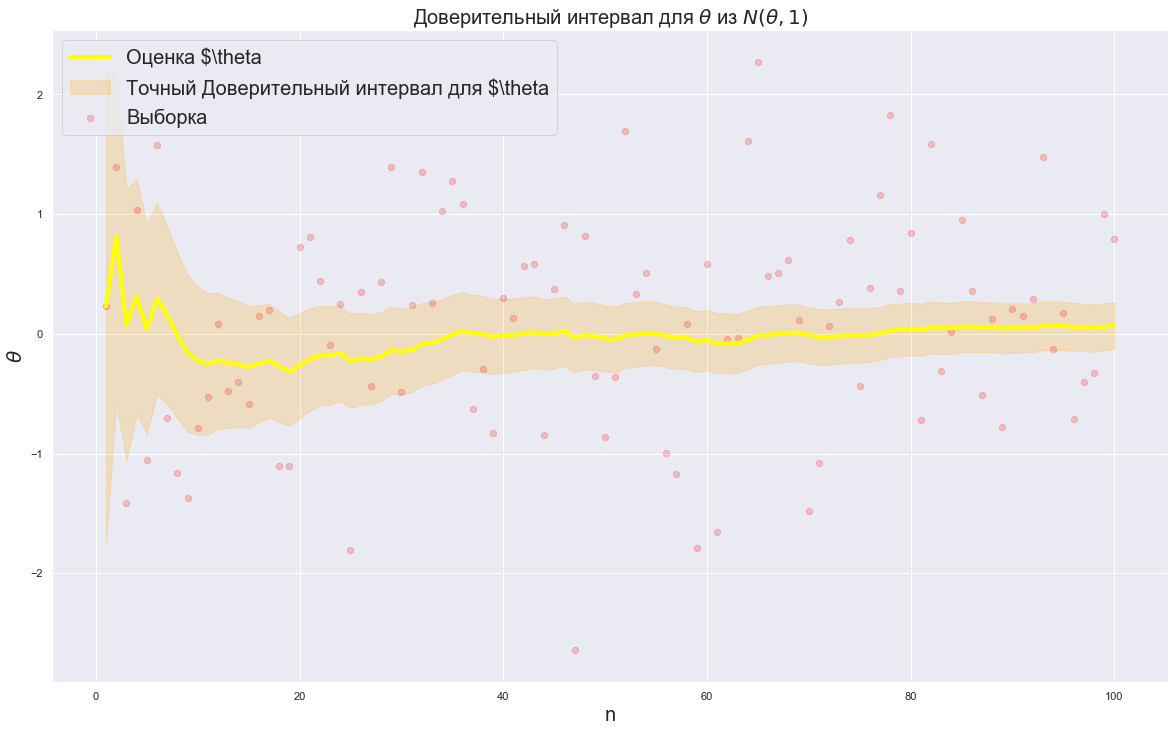

In [3]:
z = sps.norm().ppf(0.975)
sample = sps.norm().rvs(100)
mean = sample.cumsum() / np.arange(1, sample.shape[0] + 1)
indent = z / np.sqrt(np.arange(1, sample.shape[0] + 1))

plt.figure(figsize=(20, 12))
draw_confidence_interval(mean - indent, mean + indent, mean, sample,
                         label_est=r"$\theta")
plt.title(r"Доверительный интервал для $\theta$ из $N(\theta, 1)$", fontsize=20)
plt.show()

***2 случай***  
Выборка из распределения $U[0, 1]$; точный доверительный интервал минимальной длины в параметрической модели $U[0, \theta]$ на основе статистики $X_{(n)}$.

Точный доверительный интервал минимальной длины:
$$
\left( X_{(n)}, \frac{1}{(1-\alpha)^{\frac{1}{n}} \cdot }X_{(n)} \right)
$$

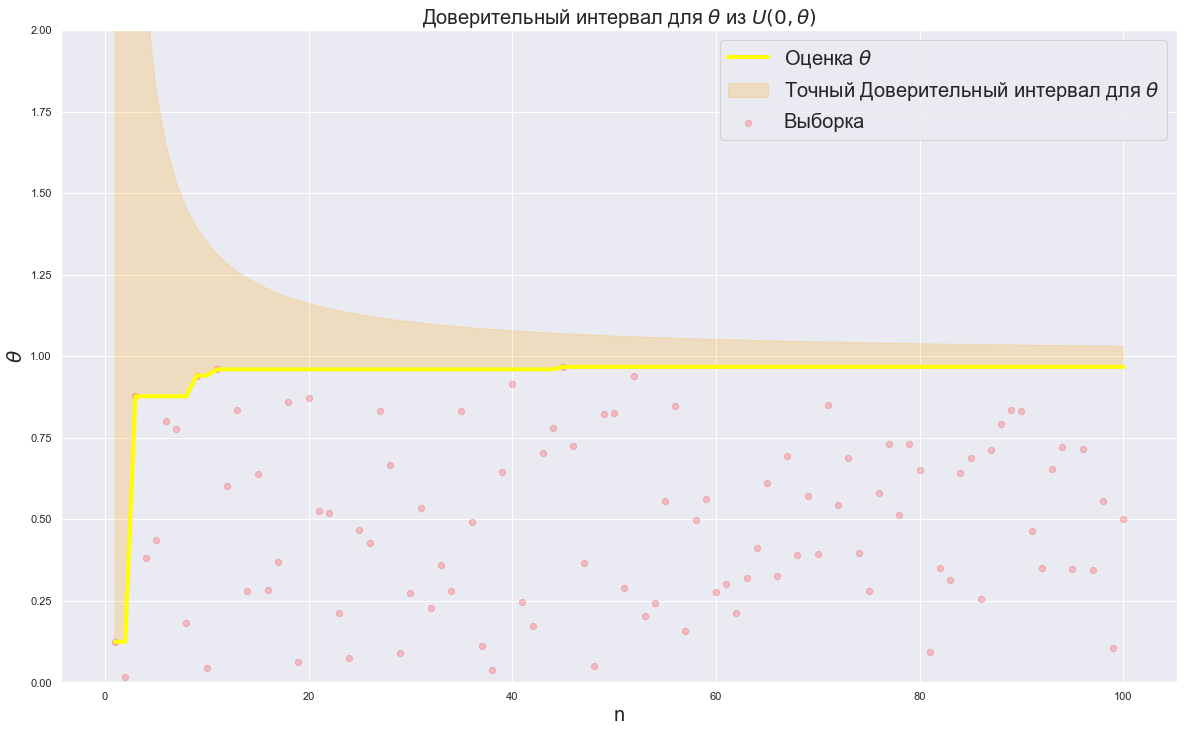

In [4]:
sample = sps.uniform().rvs(100)
cummax = np.maximum.accumulate(sample)

plt.figure(figsize=(20, 12))
draw_confidence_interval(cummax, np.power(1/0.05, 1/np.arange(1, len(sample) + 1)), cummax, sample, ylim=(0, 2))
plt.title(r"Доверительный интервал для $\theta$ из $U(0, \theta)$", fontsize=20)
plt.show()

**Вывод:** Как мы видим, с ростом $n$ доверительный интервал сужается, причем, в случае равномерного распределения он сужается быстрее, чем при нормальном. Так и должно быть, ведь корень растет медленнее, чем степенная функция.

__________________
### Задача 2.
Аналогично задаче 1 сгенерируйте выборку $X_1, ... X_{100}$ из распределения $\Gamma(3, 2)$ и постройте доверительные интервалы для следующих случаев:

* точный асимптотический доверительный интервал в параметрической модели $\Gamma(\theta, 2)$; точки выборки наносить на график не нужно;
* точный асимптотический доверительный интервал для $\theta$ в параметрической модели $\Gamma(\theta, \beta)$, причем $\beta$ неизвестно.

Изобразите интервалы *на одном* графике полупрозрачными цветами. Точки выборки наносить на график не нужно. 

In [31]:
sample = sps.gamma(a=2, scale=1/3).rvs(1000)
numbers = np.arange(1, sample.shape[0] + 1)
z = sps.norm().ppf(0.975)

Интервал в $\Gamma(\theta, 2)$:
$$
\left(\frac{\beta}{\overline{X} \cdot (\frac{z_{\frac{1+0.95}{2}}}{\sqrt{n} \cdot \sqrt{\beta}} + 1)}, \frac{\beta}{\overline{X} \cdot (-\frac{z_{\frac{1+0.95}{2}}}{\sqrt{n} \cdot \sqrt{\beta}} + 1)} \right)
$$

Интервал в $\Gamma(\theta, \beta)$:
$$
\left( \frac{\frac{\overline{X}}{S^2}}{1 + \sqrt{2 + 3 \cdot \frac{S^2}{\overline{X}^2}} \cdot \frac{z_{\frac{1+0.95}{2}}}{\sqrt{n}}}, \frac{\frac{\overline{X}}{S^2}}{1 - \sqrt{2 + 3 \cdot \frac{S^2}{\overline{X}^2}} \cdot \frac{z_{\frac{1+0.95}{2}}}{\sqrt{n}}} \right)
$$

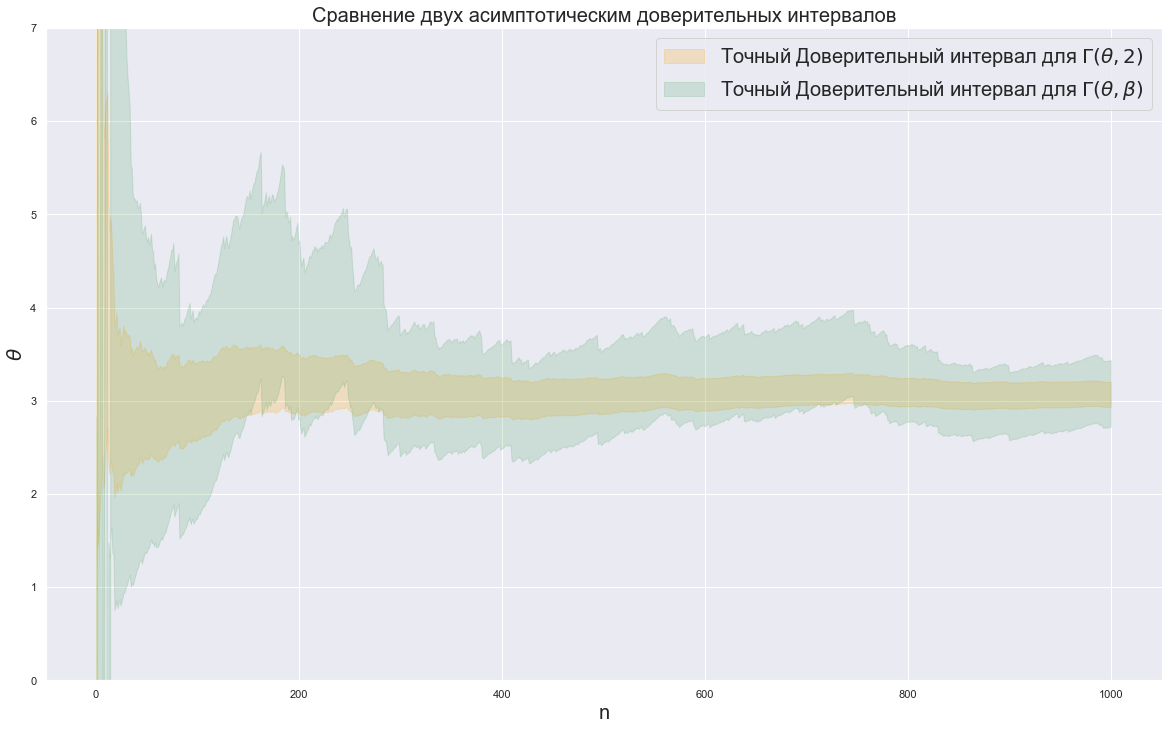

In [32]:
plt.figure(figsize=(20, 12))

mean = sample.cumsum() / numbers
left_f = 2 / (mean * (z / (np.sqrt(numbers) * np.sqrt(2)) + 1))
right_f = 2 / (mean * (-z / (np.sqrt(numbers) * np.sqrt(2)) + 1))
# рисуем первый доверительный интервал
draw_confidence_interval(left_f, right_f, ylim=(0, 7), label_est=r"$\Gamma(\theta, 2)$")

s2 = (sample**2).cumsum() / numbers - sample.mean()**2
left_s = (mean / s2) / (1 + np.sqrt(2 + 3 * s2 / mean**2) * z/np.sqrt(numbers))
right_s = (mean / s2) / (1 - np.sqrt(2 + 3 * s2 / mean**2) * z/np.sqrt(numbers))
# рисуем второй доверительный интервал
draw_confidence_interval(left_s, right_s, interval_col='g', label_est=r"$\Gamma(\theta, \beta)$", )

plt.title("Сравнение двух асимптотическим доверительных интервалов", fontsize=20)
plt.show()

Сравните полученные интервалы.

**Вывод:** Видно, что оба ассимптотических интервала "сходятся" к окрестности 3. Но при это ассимптотический интервал для $\theta$ при известной $\beta$ сходится более стабильно. Также размер интервала в первом случае меньше. Это связано с тем, что для точного доверительного интервала с неизвестным вторым параметром нам приходилось делать приближения, заменяя дисперсию на ее состоятельную оценку.

__________________
### Задача 3.
Аналогично задаче 1 сгенерируйте выборку $X_1, ... X_{100}$ из стандартного распределения Коши и постройте доверительные интервалы для следующих случаев

* точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$;
* точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя выборочную медиану;
* точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя асимптотически эффективную оценку.

Изобразите интервалы *на одном* графике полупрозрачными цветами. Точки выборки нужно нанести на график. 

In [7]:
sample = sps.cauchy().rvs(100)
z = sps.norm().ppf(0.975)
numbers = np.arange(1, sample.shape[0] + 1)

Первый интервал:
$$
\left( \overline{X} - z_{\frac{1+0.95}{2}} \cdot  \frac{1}{\sqrt{n}}, \overline{X} + z_{\frac{1+0.95}{2}} \cdot  \frac{1}{\sqrt{n}} \right)
$$

Второй интервал:
$$
\left(\mu - \frac{\pi \cdot z_{\frac{1+0.95}{2}}}{2 \cdot \sqrt{n}}, \mu + \frac{\pi \cdot z_{\frac{1+0.95}{2}}}{2 \cdot \sqrt{n}} \right)
$$
Где $\mu$ - медиана.

Третий интервал найти аналитически слишком сложно, но можно пойти легким путем и использовать метод Ньютона. По теореме с лекции первое приближение асимптотически нормальной оценки будет эквивалентно ОМП. А ОМП же является асимптотически эффективной при выполнении условий $[L1-L9]$. Это нам и нужно!  
По той же теореме с лекции эта оценка будет иметь дисперсию $i(\theta)^{-1}$ (как и ОМП), т.е. тоже являться асимптотически эффективной.

Итак, алгоритм для третьего интервала:
1. Берем а.н.о. $\theta$, например, $\mu$.
2. Выполняем один шагом в методе Ньютона:
$$
\widehat\theta_1 = \mu - l'(\mu) \cdot \frac{1}{l''(\mu)}
$$
3. Строим асимптотический доверительный интервал для $\theta$ с помощью а.н.о. $\widehat\theta_1$ c асимптотической дисперсией $2$:
$$
\left( \widehat\theta_1 - z_{\frac{1+0.95}{2}} \cdot  \sqrt\frac{2}{n}, \widehat\theta_1 + z_{\frac{1+0.95}{2}} \cdot  \sqrt\frac{2}{n} \right)
$$

In [8]:
mean = sample.cumsum() / numbers
median = pd.Series(sample).expanding().median()

# первый интервал
l1 = mean - z / np.sqrt(numbers)
r1 = mean + z / np.sqrt(numbers)

# второй интервал
l2 = median - np.pi * z / (2 * np.sqrt(numbers))
r2 = median + np.pi * z / (2 * np.sqrt(numbers))

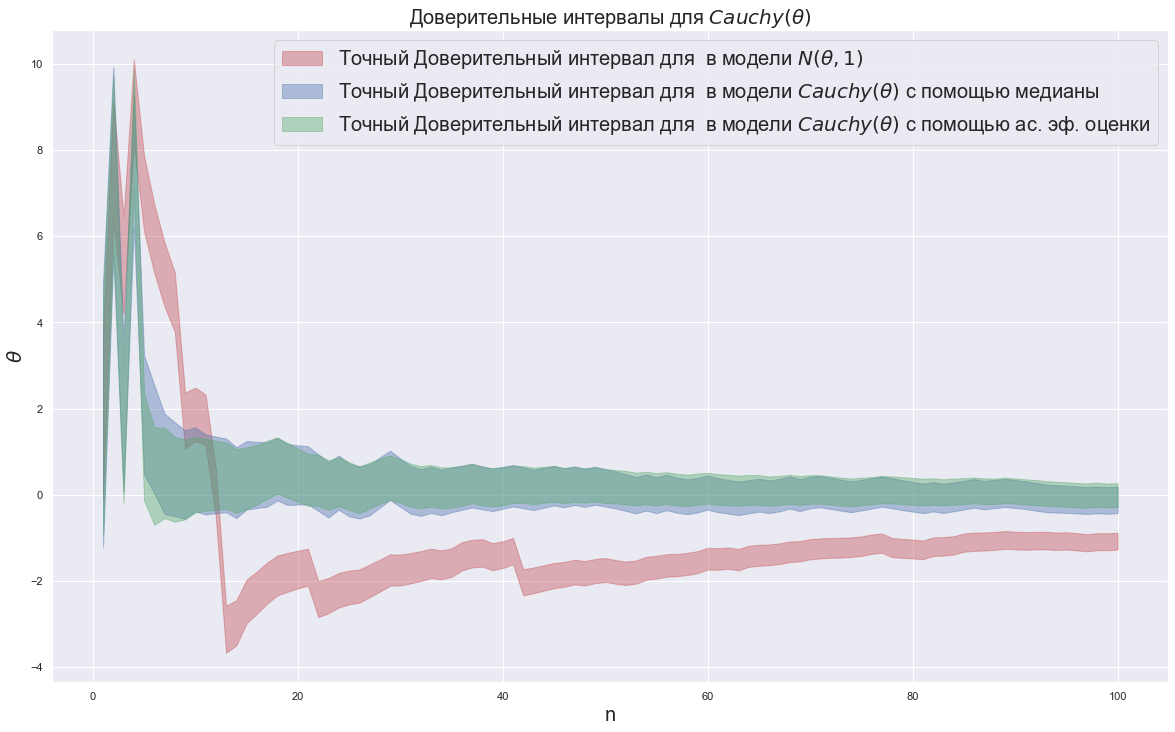

In [9]:
def f_der_cauchy(x, med):
    # первая производная логарифма функции правдоподобия
    return 2 * ((x - med) / (1 +  (x - med)**2)).sum()

def s_der_cauchy(x, med):
    # вторая производная логарифма функции правдоподобия
    return 2 * (((x - med)**2 - 1) /  (1 + (x - med)**2)**2).sum()

f_der = np.array([f_der_cauchy(sample[:i], median[i - 1])
                  for i in range(1, sample.shape[0] + 1)])
s_der = np.array([s_der_cauchy(sample[:i], median[i - 1])
                  for i in range(1, sample.shape[0] + 1)])
# третий интервал
l3 = median - f_der/s_der - z * np.sqrt(2/numbers)
r3 = median - f_der/s_der + z * np.sqrt(2/numbers)

plt.figure(figsize=(20, 12))
labels = [r"$N(\theta, 1)$",
          r"$Cauchy(\theta)$ с помощью медианы",
          r"$Cauchy(\theta)$ с помощью ас. эф. оценки"]
colors = ["r", "b", "g"]
limits = [[l1, r1], [l2, r2], [l3, r3]]
for i in range(3):
    draw_confidence_interval(limits[i][0], limits[i][1], interval_col=colors[i],
                             label_est=" в модели " + labels[i], alpha=0.4)
plt.title(r"Доверительные интервалы для $Cauchy(\theta)$", fontsize=20)
plt.show()

Сравните полученные интервалы.

**Вывод:** Первый интервал заметно отличается - он сходится не к истинному параметру, потому что мы выбрали неправильную модель. 2 и 3 интервалы сходятся к истинному значению параметра, но при этом третий интервал менее широкий, чем второй, потому что у него минимальная асимптотическая дисперсия. Это подтверждает асимптотическую эффективность 3 оценки.

__________________
### Задача 4.
Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(a, \sigma^2)$. Постройте точную доверительную область для параметра $\theta = (a, \sigma)$ уровня доверия $\alpha=0.95$ для сгенерированной выборки размера $n \in \{5, 20, 50\}$ из стандартного нормального распределения.

Из домашнего задания нам известны доверительная область для $\theta = (a, \sigma)$ уровня доверия $\alpha=0.95$
$$
\sigma^2: \left( \frac{n \cdot S^2}{\chi_{n-1, \frac{1 + \sqrt{\alpha}}{2}}}, \frac{n \cdot S^2}{\chi_{n-1, \frac{1 - \sqrt{\alpha}}{2}}} \right)
$$

$$
a: \left(\overline{X} - \sigma \cdot \frac{z_\frac{1 - \sqrt{\alpha}}{2}}{\sqrt{n}}, \overline{X} + \sigma \cdot \frac{z_\frac{1 - \sqrt{\alpha}}{2}}{\sqrt{n}} \right)
$$

In [95]:
def norm_confidence_region(sample, alpha=0.95):
    n = sample.shape[0]
    
    chi = sps.chi2(n - 1)
    S2 = (sample**2).mean() - sample.mean()**2
    l_sigma = np.sqrt(n * S2 / chi.ppf((1 + np.sqrt(alpha))/2))
    r_sigma = np.sqrt(n * S2 / chi.ppf((1 - np.sqrt(alpha))/2))
    
    sigma = np.linspace(l_sigma, r_sigma, 100)
    
    mean = sample.mean()
    z = sps.norm().ppf((1 + np.sqrt(alpha))/2)
    l_a = mean - sigma * z / np.sqrt(n)
    r_a = mean + sigma * z / np.sqrt(n)
    
    return sigma, l_a, r_a

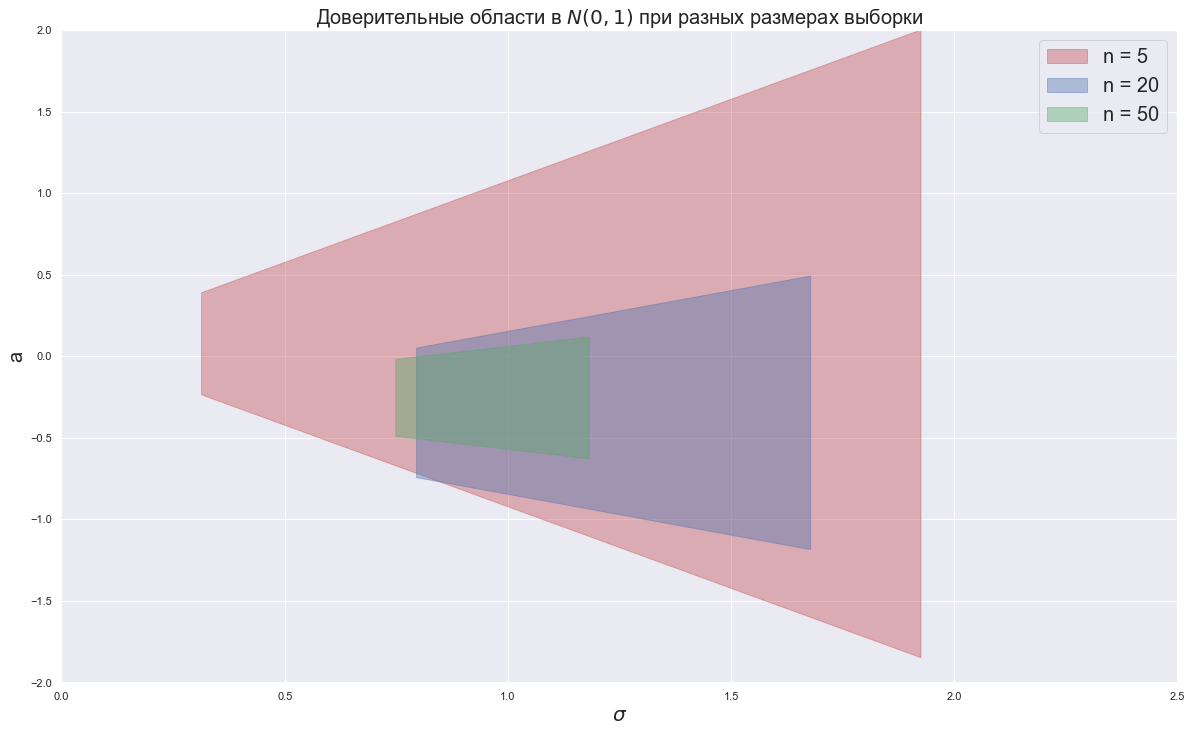

In [11]:
nums = [5, 20, 50]

plt.figure(figsize=(20, 12))
colors = iter(["r", "b", "g"])
for n in nums:
    sample = sps.norm().rvs(n)
    sigma, l_a, r_a = norm_confidence_region(sample, 0.95)
    plt.fill_between(sigma, l_a, r_a, alpha=0.4, color=next(colors),
                     label="n = {}".format(n))

plt.xlim((0, 2.5))
plt.ylim((-2, 2))
plt.legend(fontsize=20)
plt.title(r"Доверительные области в $N(0, 1)$ при разных размерах выборки", fontsize=20)
plt.xlabel(r"$\sigma$", fontsize=20)
plt.ylabel("a", fontsize=20)
plt.show()

**Вывод:** Как видно, чем больше выборка, тем сильнее сужается наша область. Так же видно, что истинное значение параметра попадает в каждую из областей как и должно быть в подавляющем большинстве случаев (т.к. $\alpha=0.95$).

__________________
### Задача 5.
 В данном задании вам нужно изучить доверительные интервалы для параметра сдвига в нормальной модели в случае неизвестной дисперсии. Требуется построить асимтотический доверительный интервал (через центральную предельную теорему и лемму Слуцкого) и точный неасимптотический (через распределения хи-квадрат и Стьюдента).

Вывод этих интервалов был разобран на семинарах. Выпишите только ответы.

Асимптотический доверительный интервал:
$$
\left( \overline{X} - z_\frac{1 - \sqrt{\alpha}}{2} \cdot \frac{S}{\sqrt{n}}, \overline{X} + z_\frac{1 - \sqrt{\alpha}}{2} \cdot \frac{S}{\sqrt{n}} \right)
$$

Точный доверительный интервал: 
$$
\left( \overline{X} - T_{n-1, \frac{1 + \alpha}{2}} \cdot \frac{S}{\sqrt{n-1}}, \overline{X} + T_{n-1, \frac{1 + \alpha}{2}} \cdot \frac{S}{\sqrt{n-1}} \right)
$$

Реализуйте функции построения этих интервалов по выборке.

In [89]:
def calculate_asymptotic_confidence_interval(sample, alpha=0.95):
    z = sps.norm().ppf((1+alpha)/2)
    
    n = sample.shape[0]
    mean = sample.mean()
    s = np.sqrt((sample**2).mean() - mean**2)
    return (mean - z * s / np.sqrt(n), mean + z * s / np.sqrt(n))

def calculate_confidence_interval(sample, alpha=0.95):
    n = sample.shape[0] - 1
    mean = sample.mean()
    t1 = sps.t(n).ppf((1+alpha)/2)
    t2 = sps.t(n).ppf((1-alpha)/2)
    s = np.sqrt((sample**2).mean() - mean**2)
    
    return (mean - t1 * s / np.sqrt(n), mean - t2 * s / np.sqrt(n))

Сгенерируйте выборку из нормального расределения и сравните два доверительных интервала в зависимости от размера выборки. Для сравнения отобразите оба интервала на одном графике. Поясните теоретическую причину такого поведения доверительных интервалов.

*Указание*: рассматривайте длину выборки около 20-30.

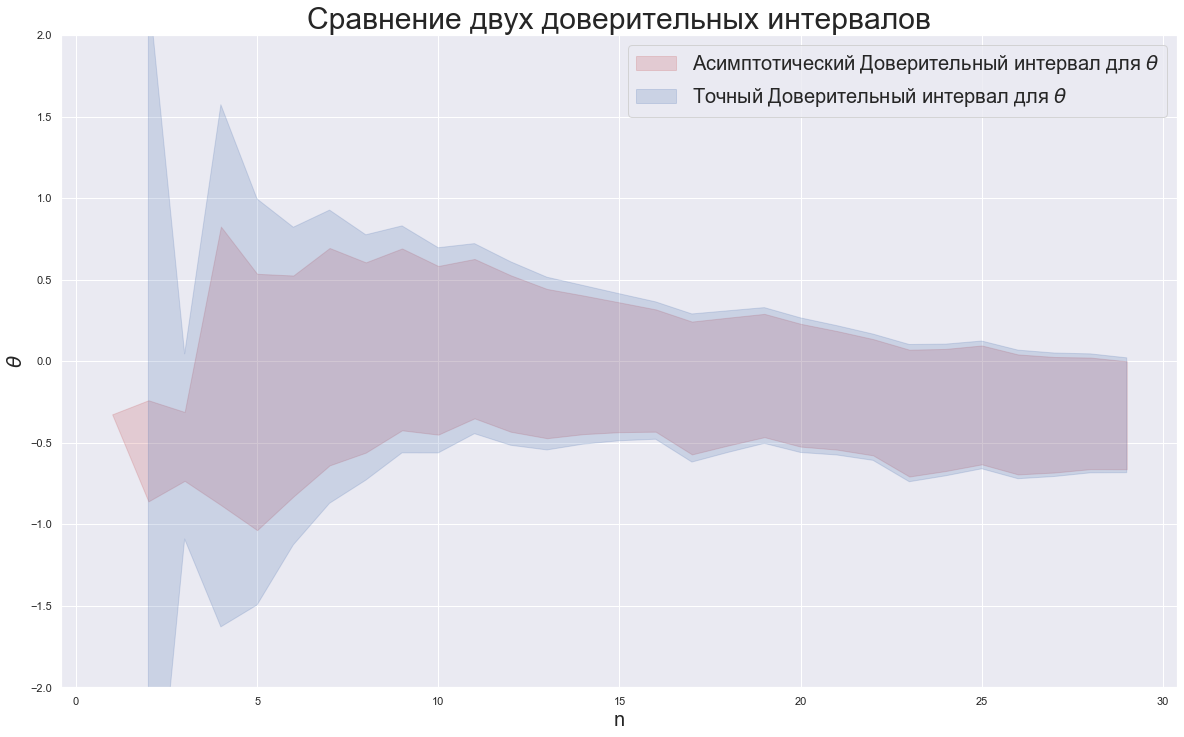

In [90]:
def compare_intervals(sample, alpha=0.95, label="", ylim=(-2, 2)):
    n = sample.shape[0]
    asymp = np.array([calculate_asymptotic_confidence_interval(sample[:i]) for i in range(1, max_n)])
    l_a = asymp[:, 0]
    r_a = asymp[:, 1]

    conf = np.array([calculate_confidence_interval(sample[:i]) for i in range(1, max_n)])
    l_c = conf[:, 0]
    r_c = conf[:, 1]

    draw_confidence_interval(l_a, r_a, interval_col='r', ylim=ylim, label_interval="Асимптотический")
    draw_confidence_interval(l_c, r_c, interval_col="b", ylim=ylim)
    plt.title("Сравнение двух доверительных интервалов"+label, size=30)
    plt.show()
    
plt.figure(figsize=(20, 12))
sample = sps.norm().rvs(30)
compare_intervals(sample)

**Вывод:** Из графика видно, что асимптотический доверительный интервал уже, чем обычный. Это связано с тем, что при вычислении обычного мы заменили неизвестную дисперсию на ее состоятельную оценку, что внесло свою погрешность.

Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a> и рассмотрите столбцы `Alcalinity of ash`, `Nonflavanoid phenols`, `Proanthocyanins` и `Hue` для вина первого типа (за тип вина отвечает первый столбец). 

Постройте доверительные интервалы для параметров сдвига каждого из столбцов, предполагая, что столбцы имеют нормальное распределение. Нужно построить доверительные интервалы обоих рассмотренных выше типов. Запишите их в виде таблицы.

In [91]:
data = pd.read_csv("wine.data")
data = data[["Alcalinity of ash", "Nonflavanoid phenols", "Proanthocyanins", "Hue"]][data.index == 1]
samples = np.array(data).T # i строка - это i столбец из нашей матрицы

In [94]:
labels = ["Alcalinity of ash", "Nonflavanoid phenols", "Proanthocyanins", "Hue"]
columns = ["asymptotic interval", "confidence interval"]
intervals = []
for sample in samples:
    asymp = np.round(calculate_asymptotic_confidence_interval(sample), 4)
    conf = np.round(calculate_confidence_interval(sample), 4)
    intervals.append((asymp, conf))

intervals = pd.DataFrame(intervals, index=labels, columns=columns)
intervals

asymptotic interval confidence interval
Alcalinity of ash     [16.3931, 17.6815]  [16.3737, 17.7009]
Nonflavanoid phenols    [0.2723, 0.3077]    [0.2717, 0.3083]
Proanthocyanins         [1.7951, 2.0036]    [1.7919, 2.0067]
Hue                     [1.0326, 1.0915]    [1.0317, 1.0924]

Наконец, постройте точную доверительную область для параметров сдвига и масштаба для каждого из рассматриваемых столбцов. Для экономии места стройте графики в два столбца.

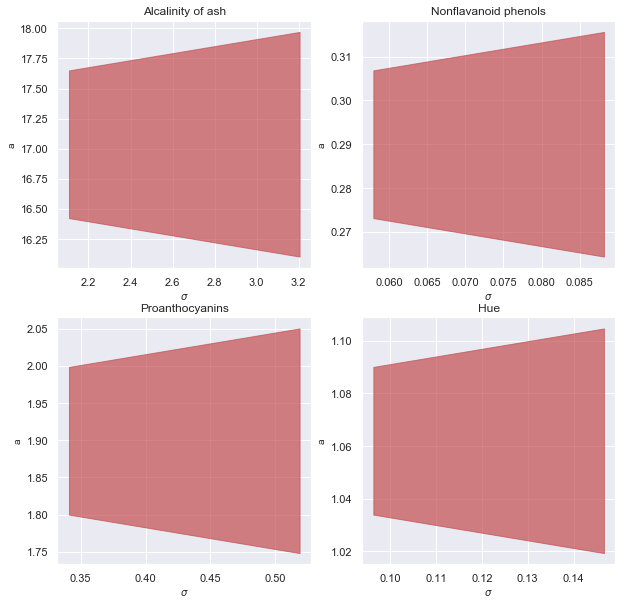

In [101]:
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.title(labels[i])
    sigma, l_a, r_a = norm_confidence_region(samples[i])
    plt.fill_between(sigma, l_a, r_a, alpha=0.7, color='r')
    plt.xlabel(r"$\sigma$", fontsize=10)
    plt.ylabel("a", fontsize=10)

**Вывод:** Мы видим, что не при всех $\sigma$ из нашей доверительной области доверительный интервал для $\theta$ попадает в нашу область. Это дополнительно ограничивает нашу доверительную область по $\sigma$.

________________

## Байесовский подход


__________________
### Задача 6.
 Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, \sigma^2)$, а параметр $\theta$ в качестве априорного распределения имеет стандартное распределение Коши со сдвигом. 

Апостериорное распределение вычисляется по формуле:
$$q\left.(t\,\right|\,x) = \frac {q(t) p_t(x_1) ... p_t(x_n)} {\int\limits_\Theta q(t) p_t(x_1) ... p_t(x_n) dt},$$ 
где $p_t(x)$ --- плотность распределения $\mathcal{N}(t, \sigma^2)$, а $q(t)$ --- плотность распределения Коши.
Как было сказано на лекции, аналитически интеграл в знаменателе посчитать не удастся. Однако, этот интеграл можно вычислить численно, например, с помощью метода Монте-Карло.

В данном случае, интеграл $\int\limits_{\mathbb{R}} f(x) p(x) dx$, где $p(x)$ -- некоторая плотность, можно оценить как  $\frac{1}{k}\sum\limits_{j=1}^k f(\xi_i)$, где $\xi_1, ..., \xi_k$ -- сгенерированная выборка из распределения, имеющего плотность $p(x)$.


Рассмотрим столбец `Alcalinity of ash` датасета <a href="http://archive.ics.uci.edu/ml/datasets/Wine">о вине</a>. 

Для выборки, образованной эти столбцом посчитайте $c$ -- знаменатель в формуле Байеса. Параметры априорного распределения выберите некоторым разумном способом, не опираясь на данные. Какой размер вспомогательной выборки в методе приближенного интегрирования необходим, чтобы с большой точностью посчитать значение $c$?


***Размер вспомогательной выборки***:
Точность метода Монте-Карло $O(\frac{1}{\sqrt{k}})$. Значит, нужно брать $k = 10...0$ где нулей: $t^2, t$ - желаемое число знаков после запятой.

In [186]:
sample = samples[0].reshape((sample.shape[0], 1)) # из прошлого задания

alpha = 25 # Выберем такую, в диапазоне 13-35
k = 100000
sigma = data.describe()["Alcalinity of ash"]["std"]
theta = sps.cauchy(loc=alpha).rvs(k)
denominator = sps.norm(loc=theta, scale=np.zeros(k) + sigma).pdf(sample).prod(axis=0).mean()
print("Знаменатель: {}".format(denominator))

Знаменатель: 3.516094332567262e-63


Для апостериорного распределения:
- Нарисуйте график плотности;
- Посчитайте математическое ожидание;
- Найдите симметричный 95%-ый доверительный интервал.

Посчитаем плотность:

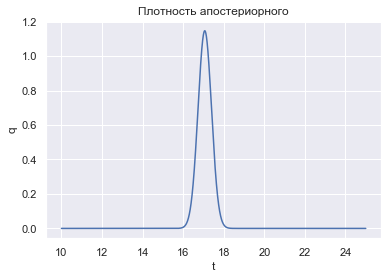

In [235]:
cauchy = sps.cauchy(loc=alpha).pdf
r = 25
l = 10
num_steps = 10000
t = np.linspace(l, r, 10000) # в ходе экспериментов
q = cauchy(t) * sps.norm(loc=t, scale=sigma).pdf(sample).prod(axis=0) / denominator
plt.plot(t, q)
plt.title("Плотность апостериорного")
plt.xlabel("t")
plt.ylabel("q")
plt.show()

Найдем матожидание:

In [236]:
exp_value_numer = (sps.norm(loc=theta, scale=sigma).pdf(sample).prod(axis=0) * theta).mean()
expected_value = exp_value_numer / denominator
print("Математическое ожидание: {}".format(expected_value))

Математическое ожидание: 17.051029233480374


Найдем доверительный интервал:

In [237]:
prob = q.cumsum() / q.sum()
t1 = t[np.argmax(prob>0.025)]
t2 = t[np.argmax(prob>0.975)]
print("Доверительный интервал уровня доверия 0.95: {}".format((t1, t2)))

Доверительный интервал уровня доверия 0.95: (16.413141314131412, 17.715271527152716)


**Вывод:** <...>

__________________
### Задача 7.
 Рассмотрим схему испытаний Бернулли (т.е. броски монет) с вероятностью успеха $p$. 

Постройте несколько графиков сопряженного распределения для разных параметров и охарактеризуйте, как его значения параметров соотносятся с априорными знаниями о монете.
Это могут быть, например, знания вида 
* монета скорее честная (при таком априорном распределении наиболее вероятны значения $p$ в окрестности 0.5);
* монета скорее нечестная, перевес неизвестен (наименее вероятны значения $p$ в окрестности 0.5);
* монета скорее нечестная, перевес в сторону герба (наиболее вероятны значения $p$ в окрестности 1);
* монета скорее честная, либо с небольшим перекосом вправо (наиболее вероятны значения $p$ в окрестности ~0.6);
* ничего не известно (все значения равновероятны).

Для каждого случая из перечисленных выше постройте график плотности сопряженного распределения (на одной фигуре).

In [ ]:
<...>

**Вывод:** <...>

Ниже приведена реализация некоторых вспомогательных функций.

In [ ]:
def draw_posteriori(grid, distr_class, post_params, xlim=None):
    ''' Рисует серию графиков апостериорных плотностей.
        grid --- сетка для построения графика
        distr_class --- класс распределений из scipy.stats
        post_params --- параметры апостериорных распределений 
                        shape=(размер выборки, кол-во параметров)
    '''
    sns.set(font_scale=1.3)
    
    size = post_params.shape[0] - 1
    
    plt.figure(figsize=(12, 7))
    for n in range(size+1):
        plt.plot(grid, 
                 distr_class(post_params[n]).pdf(grid) \
                     if np.isscalar(post_params[n]) \
                     else distr_class(*post_params[n]).pdf(grid), 
                 label='n={}: {}'.format(n, np.round(post_params[n], 3)), 
                 lw=2.5,
                 color=(1-n/size, n/size, 0))
    plt.title('Апостериорное распределение в зависимости от размера выборки')
    plt.grid(ls=':')
    plt.legend(fontsize=12)
    plt.xlim(xlim)
    plt.show()
    

def draw_estimations(ml, distr_class, post_params, confint=True, ylim=None):
    ''' Рисует графики байесовской оценки (м.о. и дов. инт.) и ОМП.
        ml --- Оценка максимального правдоподобия для 1 <= n <= len(sample)
        distr_class --- класс распределений из scipy.stats
        post_params --- параметры апостериорных распределений 
                        shape=(размер выборки, кол-во параметров)
    '''
    sns.set(font_scale=1.3, style='whitegrid', palette='Set2')
    
    size = len(ml)
    distrs = []
    for n in range(size+1): 
        distrs.append(distr_class(post_params[n]) \
                          if np.isscalar(post_params[n]) \
                          else distr_class(*post_params[n]))
    
    plt.figure(figsize=(12, 4))
    plt.plot(np.arange(size+1), [d.mean() for d in distrs], 
             label='Bayes', lw=2.5)
    plt.fill_between(np.arange(size+1), [d.ppf(0.975) for d in distrs], 
                     [d.ppf(0.025) for d in distrs], alpha=0.3)
    plt.plot(np.arange(size)+1, ml, label='MLE', lw=2.5)
    plt.title('Оценки параметра в зависимости от размера выборки')
    plt.xlabel('Размер выборки')
    plt.grid(ls=':')
    plt.ylim(ylim)
    plt.legend()
    plt.show()

Реализуйте следующую функцию

In [ ]:
def bern_posterior_params(sample, a, b):
    ''' Возвращает параметры апостериорного распределения 
        для всех 0 <= n <= len(sample).
        a, b --- параметры априорного распределения.
    '''
    
    <...>
    return params

Проведите по 15 бросков симметричной и несимметричной монет (можно сгенерировать) и рассмотрите для каждой из них два случая --- параметры априорного распределения подобраны правильно или неправильно.
Постройте графики, воспользовавшись функциями `draw_posteriori` и `draw_estimations`.

In [ ]:
<...>

Сделайте вывод. Что можно сказать про зависимость от параметров априорного распределения? Сравните байесовские оценки с оценкой максимального правдоподобия.

**Вывод:** <...>

__________________
### Задача 8.
 
Один экзаменатор на экзамене по математической статистике при выставлении оценки студенту пользуется следующей схемой. В течении экзамена экзаменатор задает студенту некоторое количество вопросов, получая тем самым выборку $X_1, ..., X_n \sim Bern(p)$ --- индикаторы того, что студент на вопрос ответил правильно.
При этом сначала он подбирает некоторое априорное распределение на основе его знаний о студенте к моменту начала ответа. После каждого ответа студента экзаменатор вычисляет апостериорное распределение и строит байесовский доверительный интервал для $p$ уровня доверия 0.95. Если после очередного ответа студента доверительный интервал содержит лишь одно число $i/10$, где $i \in \{0, ..., 10\}$, то экзаменатор выставляет студенту оценку $i+1$.

Ответьте на следующие вопросы:
* Квантили какого уровня нужно выбирать экзаменатору при построении доверительного интервала, чтобы задавать студенту как можно меньше вопросов? Какие оценки будет выставлять экзаменатор в таком случае?
* Как зависит оценка студента и среднее количество заданных вопросов у различных студентов (по уровню знаний) при различных априорных представлений экзаметора?
* Нужно ли дружить с таким экзаменатором?

In [ ]:
<...>

**Вывод:** <...>

__________________
### Задача 9.
 Проведите исследование, аналогичное задаче 7 для выборок из распределений
* $\mathcal{N}(\theta, 1)$
* $Exp(\theta)$

In [ ]:
<...>

**Вывод:** <...>

________________

## Baltic macoma


__________________
### Задача 10.

Пуассоновское распределение обычно используется для моделирования количества событий в некоторый отрезок времени или для моделирования количества объектов в некоторой области в предположении, что события или объекты появляются случайно и независимо. В курсе случайных процессов мы изучим пуассоновские процессы и поймем их связь с экспоненциальным распределением.

Пуассоновское распределение, завышенное в нуле (zero-inflated Poisson distribution), используется для моделирования случаев, в которых наблюдается завышенное содержание нулевых исходов. Например, число страховых исков в рамках населения будет иметь завышенное в нуле распределение из-за наличия тех людей, которые не оформили страховку.

Рассмотрим данные о колличествах балтийской макомы -- вид морских двустворчатых моллюсков из семейства теллинид, распространенного в северной части Атлантического и Тихого океана. В результате проведенных исследований оказалось, что во многих локациях численность видов равна нулю, поэтому стоит ожидать, что данные имеют пуассоновское распределение, завышенное в нуле.

Загрузите данные из файла `macoma.csv` и выберите столбец `macoma`. Постройте по данным гистограмму.

*Внимание!* Поскольку распределение дискретно, бины гистограммы должны соответствовать значениям величины. Для этого воспользуйтесь функцией `plt.hist(sample, range=(0, N), bins=N)`.

In [ ]:
<...>

Из теоретического домашнего задания вам известен метод поиска оценки максимального правдоподобия параметров распределения. Выпишите готовые формулы:

**Ответ:** <...>

Реализуйте метод для выданных данных. Постройте графики траекторий значений параметров в зависимости от номера итерации метода. Зависит ли результат от начального приближения?

In [ ]:
<...>

Чтобы убедиться, что вы нашли правильное решение, посчитайте значения логарифмической функции правдоподобия по двумерной сетке значений параметров $(\varepsilon, \lambda)$ и найдите максимум, используя функцию `cool_argmax` из предыдущего задания. Сравните его со значением, найденным ранее.

<...>

Распределение с подобранными параметрами сравните с гистограммой. На какой итерации визуально приближение получается наилучшим?

In [ ]:
<...>

**Ответ:** <...>

Почему при увеличении количества итерации получается плохое приближение? Предложите способ исправить этот недочет и реализуйте его.

**Описание решения:** <...>

**Реализация решения:**

In [ ]:
<...>

**Ответ (значения оценок параметров):** <...>

**Вывод:** <...>